VerifiedJoseph's "[Websites not available in the European Union after GDPR](https://data.verifiedjoseph.com/dataset/websites-not-available-eu-gdpr)" page tracks sites that used to be blocked in GDPR jurisdictions, but are no longer.

The site also provides the option to download the up-to-date copy of the database as a CSV, so let's download that.

In [5]:
import pandas as pd, numpy as np, matplotlib

In [6]:
%matplotlib inline

In [29]:
sites = pd.read_csv("https://data.verifiedjoseph.com/download/websites-not-available-eu-gdpr.csv", infer_datetime_format=True, parse_dates=True)


In [30]:
sites.columns

Index([u'Name', u'Date Unblocked', u'Website', u'Archived Block Message[0]',
       u'Archived Block Message[1]', u'Block Message Screenshot',
       u'Website Archives[0]', u'Website Archives[1]'],
      dtype='object')

In this dataset, sites that haven't been unblocked have no entry in the `u'Date Unblocked'` column, which Pandas displays to the reader as `NaN` but which are stored internally as (I think) `numpy.na`. This is missing data.

Pandas has a method to remove rows containing missing values: [`dropna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html#pandas.DataFrame.sort_values). Here, I use it to drop all rows ("sites") that have a NA value for the date when the site was unblocked. What's left are sites that have been unblocked.

In [31]:
unblocked = sites.dropna(subset=[u'Date Unblocked'])

Here's a quick preview of dates when sites have been unblocked:

In [32]:
unblocked[u'Date Unblocked'].value_counts()

2018-08-27    48
2018-08-21    28
2018-08-23    23
2018-08-20    14
2018-08-22     9
2018-08-13     6
2018-08-09     3
2018-07-28     2
2018-08-29     2
2018-08-07     2
2018-08-30     1
2018-08-14     1
2018-07-30     1
2018-08-03     1
2018-06-26     1
2018-08-06     1
2018-08-15     1
2018-08-08     1
2018-08-24     1
Name: Date Unblocked, dtype: int64

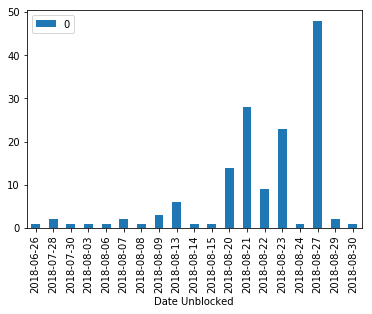

In [33]:
days = unblocked.groupby( [u'Date Unblocked'] )
days = days.size()
days = days.to_frame()
days.plot.bar()

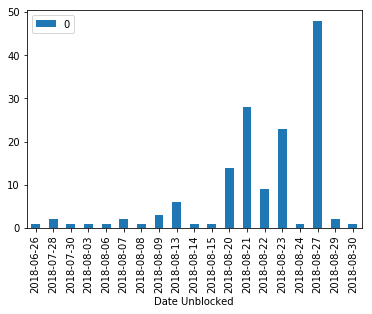

In [34]:
plot = days.plot.bar()